In [1]:
import pandas as pd
import sqlite3

In [2]:
df = pd.read_csv('Mall_customers.csv')
print("Data loaded successfully")

Data loaded successfully


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'Spending Score'], dtype='str')

In [4]:
print("Pandas version:", pd.__version__)
print("Current files:", __import__('os').listdir())

Pandas version: 3.0.0
Current files: ['.ipynb_checkpoints', 'CATIA FILE', 'data_analytics_projects', 'Malldataset.ipynb', 'Mall_Customers.csv']


In [5]:
df = df.rename(columns={
    'Spending Score': 'SpendingScore'
})

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='str')

In [7]:
conn = sqlite3.connect(':memory:')
df.to_sql('mall_customers', conn, index=False, if_exists='replace')

200

In [8]:
pd.read_sql_query("""
SELECT CustomerID, Gender, Age, AnnualIncome, SpendingScore
FROM mall_customers
ORDER BY SpendingScore DESC
LIMIT 5;
""", conn)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,12,Female,35,19,99
1,20,Female,35,23,98
2,146,Male,28,77,97
3,186,Male,30,99,97
4,128,Male,40,71,95


In [9]:
pd.read_sql_query("""
SELECT Gender, AVG(SpendingScore) AS AvgSpending
FROM mall_customers
GROUP BY Gender;
""", conn)

,Gender,AvgSpending
0,Female,51.526786
1,Male,48.511364


In [10]:
pd.read_sql_query("""
SELECT
  CASE 
    WHEN Age < 25 THEN 'Under 25'
    WHEN Age BETWEEN 25 AND 40 THEN '25-40'
    WHEN Age BETWEEN 41 AND 60 THEN '41-60'
    ELSE 'Above 60'
  END AS AgeGroup,
  COUNT(*) AS Customers,
  ROUND(AVG(SpendingScore),2) AS AvgSpending,
  ROUND(AVG(AnnualIncome),2) AS AvgIncome
FROM mall_customers
GROUP BY AgeGroup;
""", conn)


,AgeGroup,Customers,AvgSpending,AvgIncome
0,25-40,87,60.52,68.71
1,41-60,61,33.69,61.00
2,Above 60,17,44.18,50.00
3,Under 25,35,56.26,44.66


In [11]:
pd.read_sql_query("""
SELECT CustomerID, Gender, Age, AnnualIncome, SpendingScore
FROM mall_customers
WHERE AnnualIncome > 70 AND SpendingScore < 40
ORDER BY AnnualIncome DESC;
""", conn)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,199,Male,32,137,18
1,197,Female,45,126,28
2,195,Female,47,120,16
3,193,Male,33,113,8
4,189,Female,41,103,17
5,191,Female,34,103,23
6,187,Female,54,101,24
7,185,Female,41,99,39
8,183,Male,46,98,15
9,181,Female,37,97,32


In [12]:
pd.read_sql_query("""
SELECT
    ROUND(AnnualIncome/10)*10 AS IncomeRange,
    ROUND(AVG(SpendingScore),2) AS AvgSpending
FROM mall_customers
GROUP BY IncomeRange
ORDER BY IncomeRange;
""", conn)

,IncomeRange,AvgSpending
0,10.0,50.58
1,20.0,50.28
2,30.0,48.50
3,40.0,50.92
4,50.0,50.50
5,60.0,49.94
6,70.0,49.97
7,80.0,48.56
8,90.0,57.63
9,100.0,47.67


In [13]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('mall_customers', conn, index=False, if_exists='replace')

200

In [14]:
pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)

,name
0,mall_customers


In [15]:
pd.read_sql_query("PRAGMA table_info(mall_customers);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,CustomerID,INTEGER,0,None,0
1,1,Gender,TEXT,0,None,0
2,2,Age,INTEGER,0,None,0
3,3,AnnualIncome,INTEGER,0,None,0
4,4,SpendingScore,INTEGER,0,None,0


In [16]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
conn = sqlite3.connect(':memory:')
df.to_sql('mall_customers', conn, index=False, if_exists='replace')

top_spenders = pd.read_sql_query("""
SELECT *
FROM mall_customers
LIMIT 5;
""", conn)

top_spenders

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
avg_gender = pd.read_sql_query("""
SELECT Gender, AVG(SpendingScore) AS AvgSpending
FROM mall_customers
GROUP BY Gender;
""", conn)

avg_gender

,Gender,AvgSpending
0,Female,51.526786
1,Male,48.511364


In [22]:
high_income_low_spend = pd.read_sql_query("""
SELECT CustomerID, Gender, Age, AnnualIncome, SpendingScore
FROM mall_customers
WHERE AnnualIncome > 70 AND SpendingScore < 40;
""", conn)

high_income_low_spend

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,127,Male,43,71,35
1,129,Male,59,71,11
2,131,Male,47,71,9
3,133,Female,25,72,34
4,135,Male,20,73,5
5,137,Female,44,73,7
6,139,Male,19,74,10
7,141,Female,57,75,5
8,145,Male,25,77,12
9,147,Male,48,77,36


In [24]:
q1 = pd.read_sql_query("""
SELECT Gender, AVG(SpendingScore) AS AvgSpending
FROM mall_customers
GROUP BY Gender;
""", conn)

q1

,Gender,AvgSpending
0,Female,51.526786
1,Male,48.511364


<Axes: title={'center': 'Average Spending Score by Gender'}, xlabel='Gender'>

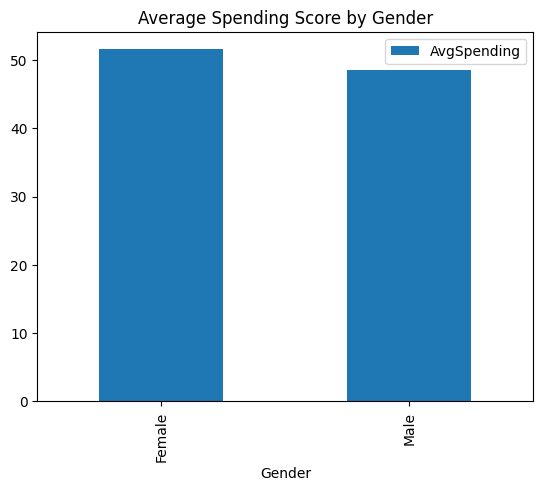

In [25]:
q1.plot(
    x='Gender',
    y='AvgSpending',
    kind='bar',
    title='Average Spending Score by Gender'
)

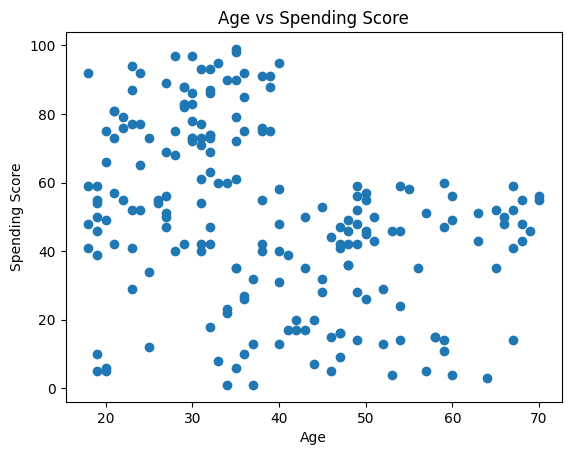

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['SpendingScore'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()